<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/02_MA_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ MA(p) 모델을 활용한 테슬라 주가 예측 코드

[*********************100%***********************]  1 of 1 completed


📌 Training MSE: 356.5894, R²: 0.8969
📌 Test MSE: 197.3093, R²: 0.3787


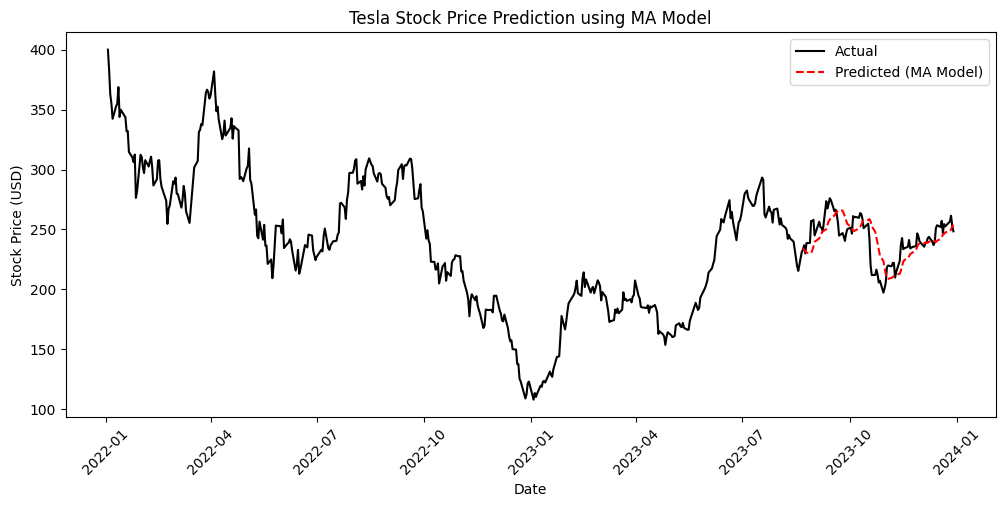

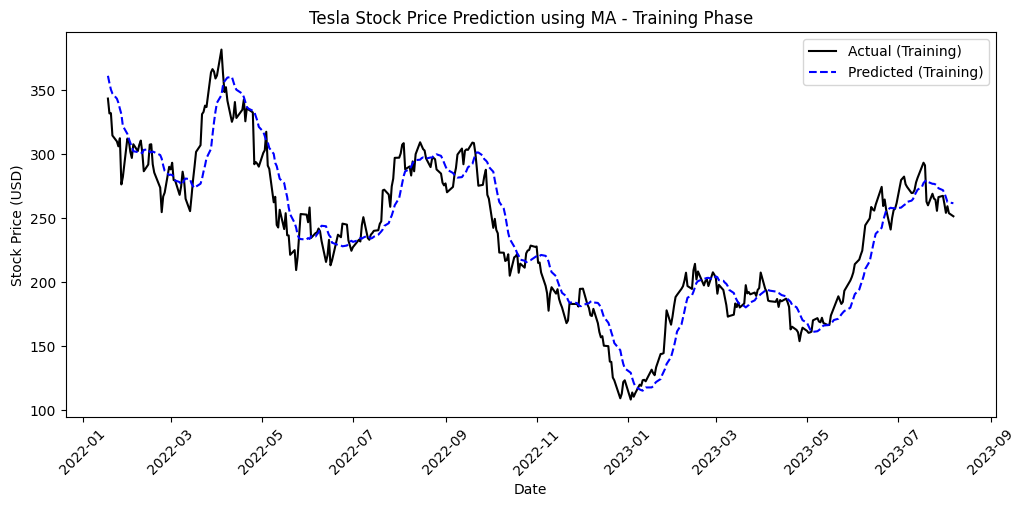

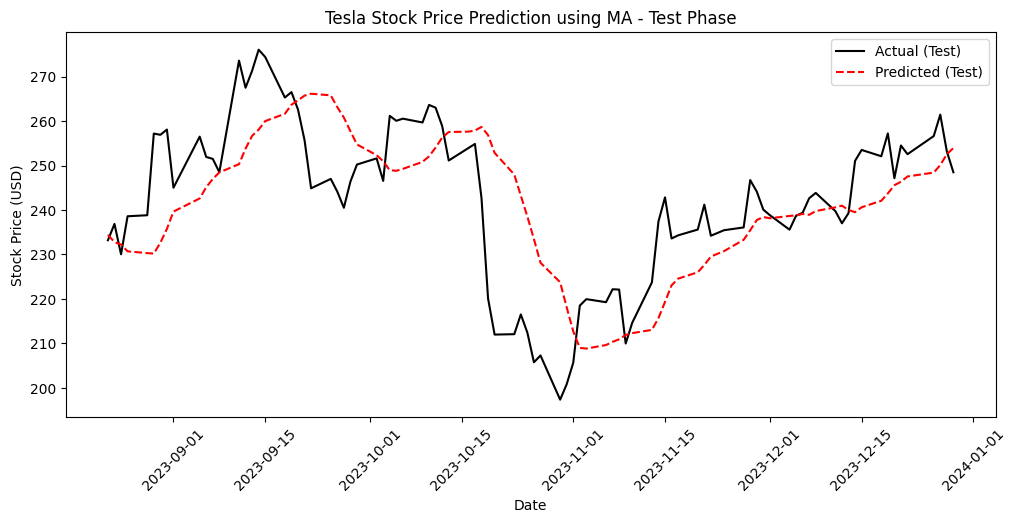

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()  # ✅ `.copy()` 추가

# 📌 3️⃣ MA(p) 모델 학습
p = 10  # 이동 평균 윈도우 크기
train.loc[:, "SMA"] = train["Close"].rolling(window=p).mean()  # ✅ `.loc[]` 사용
test.loc[:, "SMA"] = test["Close"].rolling(window=p).mean()  # ✅ `.loc[]` 사용

# 📌 4️⃣ 예측 수행 (1-step shift)
train["Predicted"] = train["SMA"].shift(1)
test["Predicted"] = test["SMA"].shift(1)

# 📌 5️⃣ 성능 평가 (결측값 제거 후 평가)
train_actual = train["Close"][p:]  # 실제값
train_pred = train["Predicted"][p:]  # 예측값
test_actual = test["Close"][p:]
test_pred = test["Predicted"][p:]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, test_pred)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 6️⃣ 결과 시각화 (전체 데이터 예측)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"][p:], test_pred, label="Predicted (MA Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using MA Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 7️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using MA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 8️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"][p:], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"][p:], test_pred, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using MA - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()
